<a href="https://colab.research.google.com/github/ErickVillagran/Scrapy_Projects/blob/master/Copy_of_DS6011_HT01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hoja de Trabajo \# 1 


---


por Josué Obregón <br>
DS6011 - Feature Engineering <br>
UVG Masters - Escuela de Negocios<br>


## Objetivos

El objetivo principal de esta hoja de trabajo  es familiarizar al estudiante en dos aspectos importantes para el desarrollo de la clase en general.

El primer aspecto es el concepto básico de lo que es **Feature Engineering**. Esto lo lograremos con un ejemplo sencillo de aplicación de la transformación de las variables predictoras para obtener mejores resultados en un modelo predictivo.

El segundo aspecto es el uso de las diferentes herramientas de tecnología que utilizaremos a lo largo del curso: GitHub, Google colab y la librería scikit-learn.

## Importación de librerías y carga de los datos a un pandas [DataFrame](https://pandas.pydata.org/pandas-docs/version/1.1.5/reference/frame.html)


Las librerías que importaremos para empezar son pandas para el manejo de los datos y matplotlib para realizar algunas gráficas. 

Los datos fueron obtenidos de un estudio de la calidad de la segmentación de imagenes para células SK-BR-3. [Link al artículo con detalles de los datos](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-8-340#Sec22) -- [Link a los datos](https://static-content.springer.com/esm/art%3A10.1186%2F1471-2105-8-340/MediaObjects/12859_2006_1712_MOESM1_ESM.csv)


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
!mkdir data

In [9]:
import gdown

url = 'https://drive.google.com/uc?export=download&id=1iaPYDUAJ8rCApeYfQplMbzeLPPUyQJ8f'
output = 'data/screening_data.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1iaPYDUAJ8rCApeYfQplMbzeLPPUyQJ8f
To: /content/data/screening_data.csv
100%|██████████| 2.06M/2.06M [00:00<00:00, 12.3MB/s]


'data/screening_data.csv'

In [10]:
df = pd.read_csv('data/screening_data.csv')

In [11]:
df.head(5)

,Unnamed: 0,Case,Class,MorphologyV2Cell.AngleCh1,MorphologyV2Cell.AngleStatusCh1,MorphologyV2Cell.AreaCh1,MorphologyV2Cell.AreaStatusCh1,MorphologyV2Cell.AvgIntenCh1,MorphologyV2Cell.AvgIntenCh2,MorphologyV2Cell.AvgIntenCh3,MorphologyV2Cell.AvgIntenCh4,MorphologyV2Cell.AvgIntenStatusCh1,MorphologyV2Cell.AvgIntenStatusCh2,MorphologyV2Cell.AvgIntenStatusCh3,MorphologyV2Cell.AvgIntenStatusCh4,MorphologyV2Cell.ConvexHullAreaRatioCh1,MorphologyV2Cell.ConvexHullAreaRatioStatusCh1,MorphologyV2Cell.ConvexHullPerimRatioCh1,MorphologyV2Cell.ConvexHullPerimRatioStatusCh1,MorphologyV2Cell.DiffIntenDensityCh1,MorphologyV2Cell.DiffIntenDensityCh3,MorphologyV2Cell.DiffIntenDensityCh4,MorphologyV2Cell.DiffIntenDensityStatusCh1,MorphologyV2Cell.DiffIntenDensityStatusCh3,MorphologyV2Cell.DiffIntenDensityStatusCh4,MorphologyV2Cell.EntropyIntenCh1,MorphologyV2Cell.EntropyIntenCh3,MorphologyV2Cell.EntropyIntenCh4,MorphologyV2Cell.EntropyIntenStatusCh1,MorphologyV2Cell.EntropyIntenStatusCh3,MorphologyV2Cell.EntropyIntenStatusCh4,MorphologyV2Cell.EqCircDiamCh1,MorphologyV2Cell.EqCircDiamStatusCh1,MorphologyV2Cell.EqEllipseLWRCh1,MorphologyV2Cell.EqEllipseLWRStatusCh1,MorphologyV2Cell.EqEllipseOblateVolCh1,MorphologyV2Cell.EqEllipseOblateVolStatusCh1,MorphologyV2Cell.EqEllipseProlateVolCh1,MorphologyV2Cell.EqEllipseProlateVolStatusCh1,MorphologyV2Cell.EqSphereAreaCh1,...,MorphologyV2Cell.NeighborMinDistCh1,MorphologyV2Cell.NeighborMinDistStatusCh1,MorphologyV2Cell.NeighborVarDistCh1,MorphologyV2Cell.NeighborVarDistStatusCh1,MorphologyV2Cell.PerimCh1,MorphologyV2Cell.PerimStatusCh1,MorphologyV2Cell.ShapeBFRCh1,MorphologyV2Cell.ShapeBFRStatusCh1,MorphologyV2Cell.ShapeLWRCh1,MorphologyV2Cell.ShapeLWRStatusCh1,MorphologyV2Cell.ShapeP2ACh1,MorphologyV2Cell.ShapeP2AStatusCh1,MorphologyV2Cell.SkewIntenCh1,MorphologyV2Cell.SkewIntenCh3,MorphologyV2Cell.SkewIntenCh4,MorphologyV2Cell.SkewIntenStatusCh1,MorphologyV2Cell.SkewIntenStatusCh3,MorphologyV2Cell.SkewIntenStatusCh4,MorphologyV2Cell.SpotFiberCountCh3,MorphologyV2Cell.SpotFiberCountCh4,MorphologyV2Cell.SpotFiberCountStatusCh3,MorphologyV2Cell.SpotFiberCountStatusCh4,MorphologyV2Cell.TotalIntenCh1,MorphologyV2Cell.TotalIntenCh2,MorphologyV2Cell.TotalIntenCh3,MorphologyV2Cell.TotalIntenCh4,MorphologyV2Cell.TotalIntenStatusCh1,MorphologyV2Cell.TotalIntenStatusCh2,MorphologyV2Cell.TotalIntenStatusCh3,MorphologyV2Cell.TotalIntenStatusCh4,MorphologyV2Cell.VarIntenCh1,MorphologyV2Cell.VarIntenCh3,MorphologyV2Cell.VarIntenCh4,MorphologyV2Cell.VarIntenStatusCh1,MorphologyV2Cell.VarIntenStatusCh3,MorphologyV2Cell.VarIntenStatusCh4,MorphologyV2Cell.WidthCh1,MorphologyV2Cell.WidthStatusCh1,MorphologyV2Cell.XCentroid,MorphologyV2Cell.YCentroid
0,207827637,Test,PS,143.247705,1,185,0,15.711864,3.954802,9.548023,2.214689,0,2,2,2,1.124509,0,0.919683,0,29.519231,13.775641,6.826923,2,2,2,4.969781,4.371017,2.718884,2,0,2,15.369540,0,3.060676,1,336.969143,0,110.096311,0,742.115646,...,99.103493,1,127.960801,0,68.783380,0,0.665148,0,2.462450,0,1.883006,0,0.454505,0.460393,1.232774,0,0,0,1,4,0,0,2781,700,1690,392,0,2,0,2,12.474676,7.609035,2.714100,0,2,2,10.642974,2,42,14
1,207932307,Train,PS,133.752037,0,819,1,31.923274,205.878517,69.916880,164.153453,0,0,0,0,1.263158,1,0.797080,2,31.875000,43.122283,79.308424,0,0,0,6.087592,6.642761,7.880155,0,1,1,32.305584,1,1.558394,0,2232.905485,1,1432.824568,1,3278.725624,...,30.111141,0,81.380633,2,154.898761,1,0.539758,2,1.468181,0,2.255810,0,0.398705,0.619731,0.527263,0,0,0,4,11,1,1,24964,160997,54675,128368,0,1,1,1,18.809225,56.715352,118.388139,0,0,0,32.161261,1,215,347
2,207932463,Train,WS,106.646387,0,431,0,28.038835,115.315534,63.941748,106.696602,0,0,0,0,1.053310,0,0.935475,0,32.487710,35.985770,51.357050,0,0,0,5.883557,6.683000,7.144601,0,1,0,23.448919,0,1.375386,0,802.194544,0,583.250400,0,1727.410431,...,34.944765,0,90.437683,2,84.564598,0,0.724312,1,1.328408,0,1.272193,0,0.472487,0.971379,0.324707,0,0,0,2,6,0,0,11552,47510,26344,43959,0,0,0,0,17.295643,37.671053,49.470524,0,


## Selección de columnas a trabajar y generación de un gráfico de dispersión

En este ejemplo trabajaremos con dos columnas predictoras específicas. No es necesario saber el contexto sobre el significado de éstas, por lo tanto les cambiaremos el nombre a *PredictorA* y *PredictorB*.  

La columna *Class* indica a que clase pertenece cada registro (poorly segmented *PS* or well-segmented *WS*).  Desde acá vemos que la variable salida de nuestro trabajo es una categoría, por lo tanto la tarea de aprendizaje supervisado en Machine Learning es **clasificación**.

La columna *Case* indica si el registro fue utilizado para entrenamiento o para prueba (e.g., *Train* o *Test*). Con ésta información podemos dividir nuestro conjunto de datos. También podemos optar por dividir el conjunto de datos de forma aleatoria, pero si deseamos crear resultados repetibles, la división del conjunto de datos debe ser la misma entre distintas repeticiones del mismo experimento. Esto es bastante común en el ambito académico donde los resultados de los experimentos pueden ser verificados por otros investigadores.

Basados en esta información, podemos realizar un gráfico de dispersión para observar la relación de estos predictores.

<blockquote> 
Debemos tomar en cuenta que al momento de realizar EDA (Exploratory Data Analysis), utilizemos solamente los datos de entrenamiento para evitar cualquier fuga de datos ( <a href="https://en.wikipedia.org/wiki/Leakage_%28machine_learning%29#Training_example_leakage">Training example leakage</a>).
</blockquote>

In [12]:
columns = ['MorphologyV2Cell.EqSphereAreaCh1', 'MorphologyV2Cell.PerimCh1', 'Class', 'Case']
new_names = ['PredictorA','PredictorB', 'Class', 'Case']

In [13]:
df = df[columns]
df.columns = new_names

In [ ]:
df.head()

,PredictorA,PredictorB,Class,Case,color
0,742.115646,68.783380,PS,Test,cornflowerblue
1,3278.725624,154.898761,PS,Train,cornflowerblue
2,1727.410431,84.564598,WS,Train,darkorange
3,1194.931973,101.091070,PS,Train,cornflowerblue
4,1140.426304,86.466698,PS,Test,cornflowerblue


In [14]:
color_dict = {'PS':'cornflowerblue', 'WS':'darkorange'}
df['color']= df['Class'].map(color_dict)

In [15]:
train = df[df['Case']=='Train']
test = df[df['Case']=='Test']

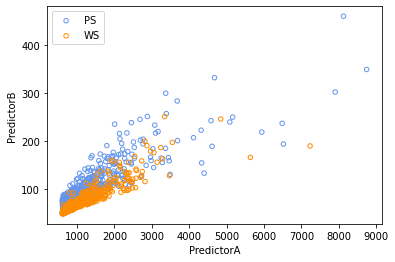

In [16]:
fig, ax = plt.subplots()
for class_ in pd.unique(df['Class']):
  train[train['Class']==class_].plot.scatter('PredictorA','PredictorB', c='none', edgecolor=color_dict[class_],label=class_, ax=ax)

## Entrenamiento de un modelo predictivo

El siguiente paso es entrenar un modelo de datos predictivo. Vamos a utilizar un modelo simple, una regresión logística. 



1.   Importamos las funciones necesarias de la librería [scikit_lern](https://scikit-learn.org/0.22/index.html) (v0.22 al momento de hacer este tutorial). 
2.   Creamos nuestras variables de entrenamiento, dividiendo el conjunto de datos en variables predictoras (usualmente representadas con una $X$) *X_train*,  y la variable objetivo (usualmente representada con una $y$) *y_train*, hacemos lo mismo para los datos de prueba, esto es *X_test* y *y_test*
3.   Entrenamos el modelo llamando a la función *fit*.
4.   Generamos el gráfico ROC ([Receiver Operating Characteristic](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)) y calculamos el áera bajo la curva.
5.   Analizamos



In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [18]:
X_train = train[['PredictorA','PredictorB']]
y_train = train['Class']

X_test = test[['PredictorA','PredictorB']]
y_test = test['Class']

In [19]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

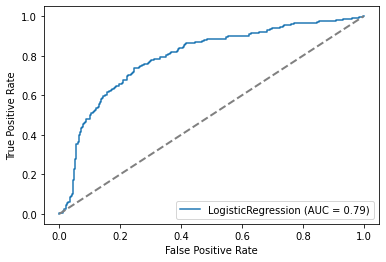

In [20]:
roc_curve = metrics.plot_roc_curve(clf, X_test, y_test)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

## Exploración de los predictores

La ROC-AUC obtenida con los predictores sin ningún tipo de procesmaiento arrojó un valor de 0.79, el cual es un resultado decente, pero probablemente se puede mejorar. 

Primero veamos el resumen de estadísticos y luego veamos la distribución de los valores en los dos predictores. 

In [21]:
train.describe()

,PredictorA,PredictorB
count,1009.000000,1009.000000
mean,1302.497250,91.606820
std,866.220998,41.962245
min,603.755102,47.737594
25%,779.850340,64.366964
50%,1027.222222,79.021475
75%,1505.195011,103.241588
max,8746.063492,459.765378


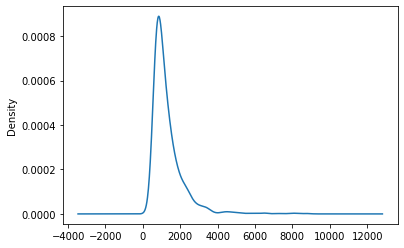

In [22]:
X_train['PredictorA'].plot.kde()

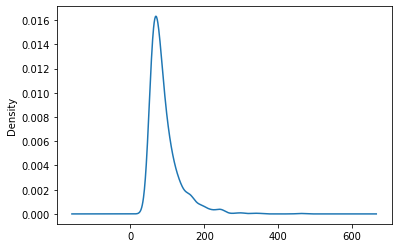

In [23]:
X_train['PredictorB'].plot.kde()

Vemos que los predictores no tienen valores negativos, y que la distribución está sesgada a la derecha. Esto se puede corrobarar visualmente, pero también podemos analizar la media y la mediana. En este caso, la media es mas grande que la mediana, por lo tanto es una distribución con sesgo a la derecha.

Como referencia veamos la siguiente imágen.

![picture](https://www.statisticshowto.com/wp-content/uploads/2014/02/pearson-mode-skewness.jpg)


## Transformación Box-Cox

Una forma de transformar las variables dependientes que tienen una distribución con sesgo a una distribución normal, es utilizar las transformación potencial conocida como Box-Cox. Esta la estudiaremos con más detalle en las próximas unidades, pero de momento utilizemos esta transformación en nuestros dos predictores.

La forma de transformar los predictores es utilizando la clase [PowerTransformer](https://scikit-learn.org/0.22/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer) de las librerías de preprocesamiento de scikit-learn. 

Realicemos esta transformación y luego entrenmos nuevamente una Regresión Logística y evaluemos el ROC-AUC.

In [24]:
from sklearn.preprocessing import PowerTransformer

In [25]:
box_cox_transformer = PowerTransformer()
X_train_transformed = box_cox_transformer.fit_transform(X_train)

Vemos los parámetros para cada predictor. Si el valor es cercano a -1, signfica que la transformación encuentra el valor inverso del valor original

In [26]:
box_cox_transformer.lambdas_

array([-0.85848129, -1.11271383])

Ahora generamos las gráficas de densidad de los predictores, podemos ver que ya distribución ahora está mas normalizada.

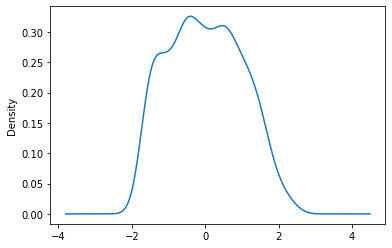

In [ ]:
pd.DataFrame(X_train_transformed)[0].plot.kde()

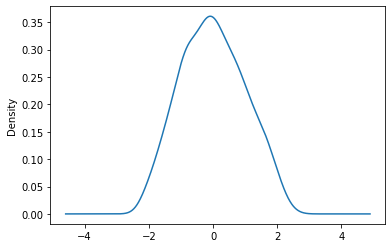

In [27]:

pd.DataFrame(X_train_transformed)[1].plot.kde()

In [28]:
train['A_transformed'] = X_train_transformed[:,0]
train['B_transformed'] = X_train_transformed[:,1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


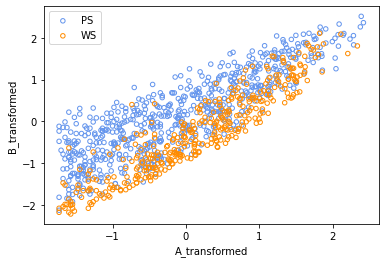

In [29]:
fig, ax = plt.subplots()
for class_ in pd.unique(df['Class']):
  train[train['Class']==class_].plot.scatter('A_transformed','B_transformed', c='none', edgecolor=color_dict[class_],label=class_, ax=ax)

In [30]:
clf_transformed = LogisticRegression()
clf_transformed.fit(X_train_transformed, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

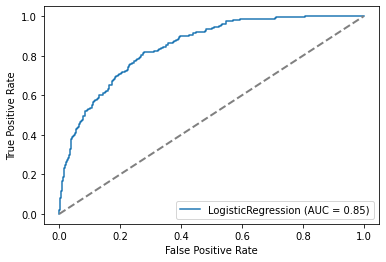

In [31]:
roc_curve = metrics.plot_roc_curve(clf_transformed, box_cox_transformer.transform(X_test), y_test)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

## Comparación de resultados

Podemos observar claramente que una simple transformación mejoró el rendimiento del modelo predictor en aproximadamente 6%. Abajo podemos graficar los dos ROC para visualizar más fácilmente la comparación entre los dos resultados

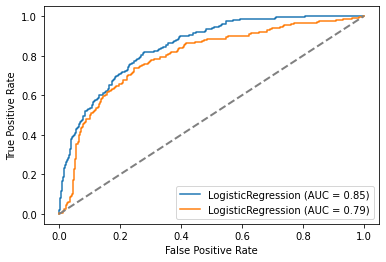

In [32]:
roc_curve = metrics.plot_roc_curve(clf_transformed, box_cox_transformer.transform(X_test), y_test)
metrics.plot_roc_curve(clf, X_test, y_test, ax= roc_curve.ax_)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

## Scikit-learn pipelines


Una forma de realizar el trabajo de manera más limpia y automatizada son los [pipelines](https://scikit-learn.org/0.22/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline) de scikit-learn. En este caso solo tenemos una transformación de las variables predictoras, pero en algunos casos, estas transformaciones se hacen en cadena, y es alli cuando los **pipelines** son más útiles.

De cualquier forma, para terminar esta hoja de trabajo, utilicemos los pipelines para realizar el mismo ejercicio de utilizar primero una transformación Cox-Box y luego el entrenamiento de un modelo predictivo.

In [33]:
from sklearn.pipeline import Pipeline

In [34]:
estimators = [('box_cox_transform',PowerTransformer()), ('logistic_regression',LogisticRegression())]
pipe = Pipeline(estimators)

In [35]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('box_cox_transform',
                 PowerTransformer(copy=True, method='yeo-johnson',
                                  standardize=True)),
                ('logistic_regression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

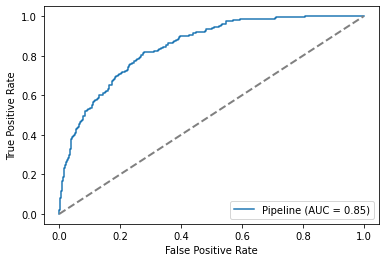

In [36]:
roc_curve = metrics.plot_roc_curve(pipe, X_test, y_test)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')